In [1]:
import numpy as np
from scipy.stats import kstest
import matplotlib.pyplot as plt
import scipy.stats

In [2]:
def mc_summary(sample, alpha):
    mu = sample.mean()
    std = sample.std(ddof = 1)

    z = scipy.stats.norm.ppf(1.0-alpha/2.0)
    uncertainty = z*std/np.sqrt(len(sample))
    print("Estimate\tUncertainty\n"+"-"*27)
    print("%.4f\t\t± %.4f" % (mu, uncertainty))

# TODO: a)

# b)

In [3]:
g = lambda x: 1 / (np.pi * (1 + x**2))  # Cauchy PDF
f = lambda x: 2 / (np.pi * ((1 + x**2)**2))  # Target PDF
F = lambda x: 0.5 + (1/np.pi) * (np.arctan(x) + x/(1 + x**2))
C = 2

In [4]:
def sample_f(N):    
    sample = []
    while len(sample) < N:
        Y = np.random.standard_cauchy(1)[0]
        U = np.random.rand()
        if U <= f(Y) / (C * g(Y)):
            sample.append(Y)
        
    return np.array(sample)

In [5]:
N = 1000
sample = sample_f(N)
x = np.linspace(-25, 25, N)
true_cdf = F(x)
true_pdf = f(x)
kstest(sample, F).pvalue # High pvalue is expected

np.float64(0.8995968264359283)

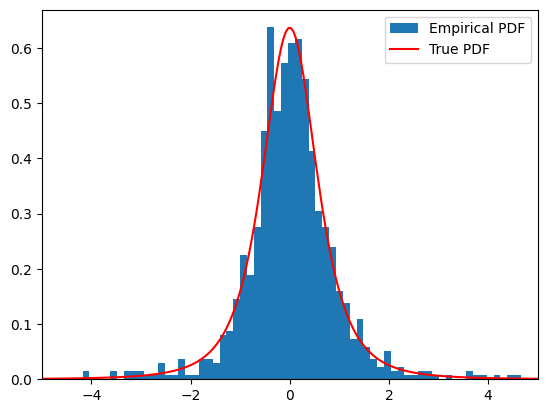

In [6]:
plt.hist(sample, density = True, bins = 100, label = 'Empirical PDF')
plt.plot(x, true_pdf, color='red', label='True PDF')
plt.xlim(-5, 5)
plt.legend()
None

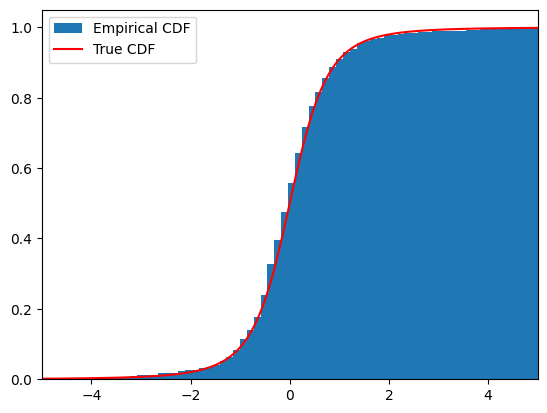

In [7]:
plt.hist(sample, cumulative=True, density=True, bins=100, label='Empirical CDF')
plt.plot(x, F(x), color='red', label='True CDF')
plt.xlim(-5, 5)
plt.legend()
None

# c)

In [8]:
N = 1000
alpha = 0.05

np.random.seed(42)  # For reproducibility

samples_mc = sample**2
mc_summary(samples_mc, alpha)

Estimate	Uncertainty
---------------------------
1.0045		± 0.2144


# d)

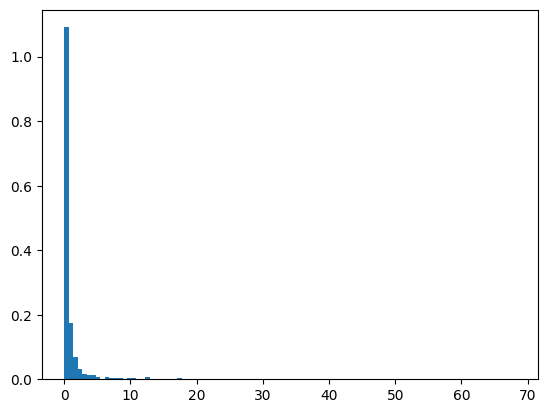

In [9]:
plt.hist(samples_mc, density=True, bins=100, label='Empirical PDF')
None

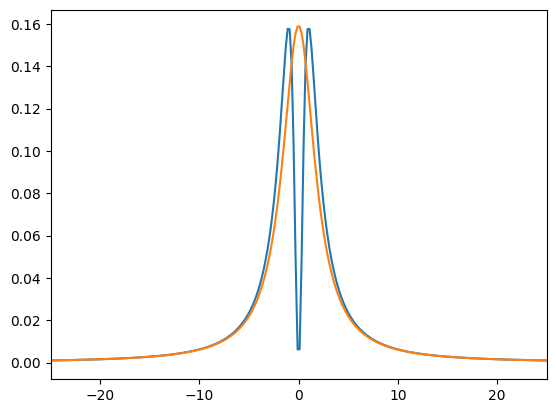

In [10]:
psi = lambda x : x*x
candidate = lambda x : scipy.stats.cauchy.pdf(x, scale=2) # manually tested some functions

y = np.linspace(-100, 100, N)

plt.plot(y, psi(y)*f(y))
plt.plot(y, candidate(y))
plt.xlim(-25,25)
None

In [11]:
g = lambda x : scipy.stats.cauchy.pdf(x, scale=2) # candidate

In [12]:
def importance_sampling(N):
    x_tilde = scipy.stats.cauchy.rvs(scale=2,size=N)
    samples = []
    for i in range(N):
        samples.append(psi(x_tilde[i]) * f(x_tilde[i]) / g(x_tilde[i]))

    return np.array(samples)

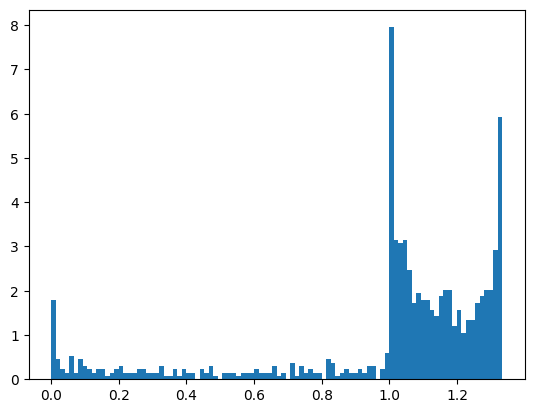

In [13]:
samples_is = importance_sampling(N)
plt.hist(samples_is, density=True, bins=100)
None

In [14]:
mc_summary(samples_is, alpha)

Estimate	Uncertainty
---------------------------
1.0009		± 0.0214


# e)

# TODO: Prove minimum is monotone and the distribution is symmetric.

In [15]:
N = 3000
S1 = sample_f(N)
S2 = sample_f(N)
psi = lambda x, y: np.minimum(x, y)

In [16]:
samples = psi(S1, S2)
mc_summary(samples, alpha)

Estimate	Uncertainty
---------------------------
-0.4414		± 0.0265


In [17]:
N = 3000
S1 = sample_f(N)
S2 = sample_f(N)
X = np.array([S1, S2]).T
X_anti = -X

In [18]:
psi_x = np.apply_along_axis(lambda row: psi(*row), axis=1, arr=X)
psi_x_anti = np.apply_along_axis(lambda row: psi(*row), axis=1, arr=X_anti)
Z = 0.5*(psi_x + psi_x_anti)

In [19]:
mc_summary(Z, alpha)

Estimate	Uncertainty
---------------------------
-0.4434		± 0.0141
